In [1]:
import sys
sys.path.append("/data1/practical-sose23/castellvi/3D-Castellvi-Prediction/src/utils")
from _prepare_data import *

from BIDS import BIDS_FILE, Centroids, Image_Reference, Centroid_Reference, NII
from BIDS.snapshot2D.snapshot_modular import Snapshot_Frame,create_snapshot, Visualization_Type
from pathlib import Path

WORKING_DIR = "/data1/practical-sose23/castellvi/"

dataset = ['/data1/practical-sose23/dataset-verse19',  '/data1/practical-sose23/dataset-verse20']
data_types = ['rawdata',"derivatives"]
image_types = ["ct", "subreg", "cortex"]
master_list = '/data1/practical-sose23/castellvi/3D-Castellvi-Prediction/src/dataset/VerSe_masterlist.xlsx'

processor = DataHandler(master_list=master_list ,dataset=dataset, data_types=data_types, image_types=image_types)
processor._drop_missing_entries()

[!] Unknown format seg-ano in file sub-verse649_dir-sag_seg-ano.nii.gz
[!] Unknown format iso-ctd in file sub-verse616_dir-iso_iso-ctd.json
[!] Unknown format subreg in file sub-verse559_CT-sag_seg-ano_subreg.nii.gz
Number of missing subjects: 40
Number of missing sacrum_seg: 40
All missing subjects has no information about sacrum segmentation


In [2]:
bids_subjects, master_subjects = processor._get_subject_samples()
bids_families = [processor._get_subject_family(subject) for subject in bids_subjects]
i = 0
for family in bids_families:
    if i > 9: 
        break
    seg_nii = processor._get_cutout(family = family, return_seg = True, max_shape = (128,128,128))
    ct_nii = processor._get_cutout(family = family, return_seg = False, max_shape = (128,128,128))
    seg_nii.save("/u/home/regenbre/tmp/seg_{}.nii.gz".format(i))
    ct_nii.save("/u/home/regenbre/tmp/ct_{}.nii.gz".format(i))
    print(ct_nii.shape, seg_nii.shape)
    i = i + 1


Number of missing subjects: 0
Number of missing sacrum_seg: 0
All missing subjects has no information about sacrum segmentation
Total families in the dataset: 342
Subjects with multiple families: ['verse400', 'verse401', 'verse402', 'verse403', 'verse404', 'verse405', 'verse406', 'verse407', 'verse408', 'verse409', 'verse410', 'verse411', 'verse412', 'verse413', 'verse414', 'verse415', 'verse416', 'verse417']
[*] Save /u/home/regenbre/tmp/seg_0.nii.gz as uint8
[*] Save /u/home/regenbre/tmp/ct_0.nii.gz as float32
(128, 128, 128) (128, 128, 128)
[*] Save /u/home/regenbre/tmp/seg_1.nii.gz as uint8
[*] Save /u/home/regenbre/tmp/ct_1.nii.gz as float32
(128, 128, 128) (128, 128, 128)
[*] Save /u/home/regenbre/tmp/seg_2.nii.gz as uint8
[*] Save /u/home/regenbre/tmp/ct_2.nii.gz as float32
(128, 128, 128) (128, 128, 128)
[*] Save /u/home/regenbre/tmp/seg_3.nii.gz as uint8
[*] Save /u/home/regenbre/tmp/ct_3.nii.gz as float32
(128, 128, 128) (128, 128, 128)
[*] Save /u/home/regenbre/tmp/seg_4.nii

[*] Snapshot saved: /u/home/regenbre/tmp/snap.jpg


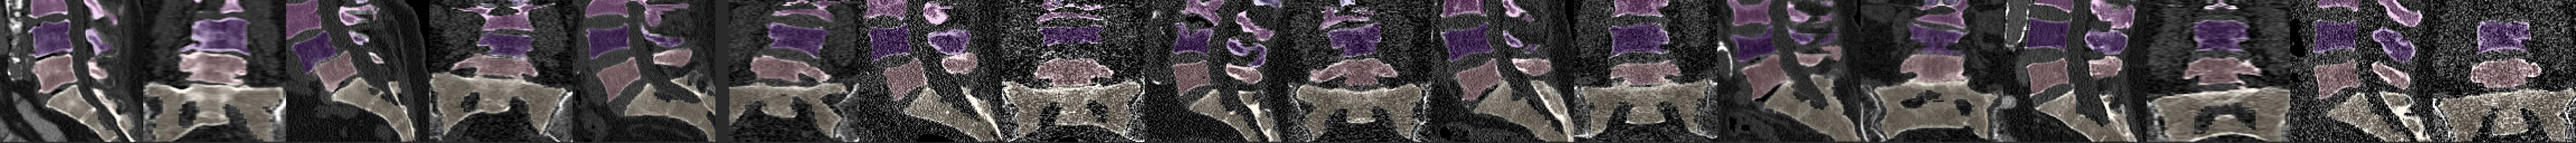

In [5]:
from IPython.display import Image
out_file = Path('/u/home/regenbre/tmp/snap.jpg')
ct_niis = ["/u/home/regenbre/tmp/ct_{}.nii.gz".format(i) for i in range(9)]
seg_niis = ["/u/home/regenbre/tmp/seg_{}.nii.gz".format(i) for i in range(9)]
ct_frames = [Snapshot_Frame(image = ct_niis[i],segmentation=seg_niis[i],sagittal = True, coronal = True,mode='CT') for i in range(9)]
create_snapshot(out_file,ct_frames)

Image(filename=out_file) 